## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv")

Первые 5 строк:

In [3]:
df.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


Последние 5 строк:

In [4]:
df.tail(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


Размер:

In [5]:
df.shape

(1000, 21)

### Задание 2 

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и номинальные.

In [6]:
print("Количество пропусков по каждой колонке:")
df.isna().sum()

Количество пропусков по каждой колонке:


status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

Пропусков нет

status - порядковый, так как есть интервалы, и их количество конечно 

duration - количественный, тут очевидно   

credit_history - порядковый,    

purpose - номинальный, причины взятия кредита могут расширяться, и по своей сути они не сравнимы между собой 

amount - количественный, тоже очевидно    

savings - порядковый, могут быть сравнимы между собой , даны интервалами   

employment_duration - порядковый, как и выше 

installment_rate - порядковый , как и выше   

personal_status_sex - номинальный, так как сравнивать между собой их нельзя       

other_debtors - номинальный,не можем явно сравнить,  

present_residence - порядковый, не сравнимы между собой, могут дополняться             

property - номинальный, сравнить между собой их нельзя       

age - количественный, все понятно     

other_installment_plans - номинальный, так этот паремтр может расширяться    

housing - номинальный, нельзя сравнить между собой            

number_credits - порядковый, очевидные интервалы, сравнимы между собой       

job - номинальный, нельзя сравнить         

people_liable - порядковый, хоть есть только два значения, но могли разделить их на 3 и более  

telephone - бинарный, есть только да или нет       

foreign_worker - бинарный, есть только да или нет     

credit_risk - бинарный, есть только да или нет          

### Задание 3 

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [7]:
df.groupby('purpose',as_index = False)['amount'].mean()

,purpose,amount
0,business,8209.333333
1,car (new),5370.223301
2,car (used),3066.983425
3,domestic appliances,2728.090909
4,furniture/equipment,2487.685714
5,others,3062.948718
6,radio/television,1498.000000
7,repairs,3180.400000
8,retraining,4158.041237
9,vacation,1205.888889


### Задание 4 


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [8]:
a = (df[(df['age']<30)&(df['housing']=='rent')]['age'].count()/df[(df['age']<30)]['age'].count()*100).round(2)
b = (df[(df['age']>40)&(df['housing']=='rent')]['age'].count()/df[(df['age']>40)]['age'].count()*100).round(2)

print(f"Процент клиентов моложе 30 лет снимает жилье: {a}")
print(f"Процент клиентов старше 40 лет снимает жилье: {b}")

Процент клиентов моложе 30 лет снимает жилье: 66.67
Процент клиентов старше 40 лет снимает жилье: 68.01


### Задание 5 

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [9]:
a = df[(df['foreign_worker']=="yes")&((df['number_credits']=='4-5')|(df['number_credits']=='>= 6'))]['age'].count()
print(f"{a} иностранец(-ев) имеет больше трех кредитов")

1 иностранец(-ев) имеет больше трех кредитов


### Задание 6 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

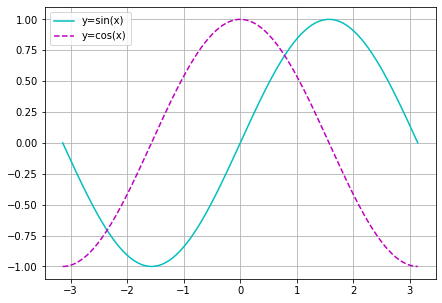

In [11]:
x = np.linspace(-np.pi, np.pi, 201)
plt.figure(figsize=(7, 5))
plt.plot(x ,np.sin(x),color='c' ,label="y=sin(x)")
plt.plot(x,np.cos(x),color='m',linestyle="--", label="y=cos(x)")
plt.legend()
plt.grid(True)

### Задание 7

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта с помощью зеркальных горизонтальных гистограмм.

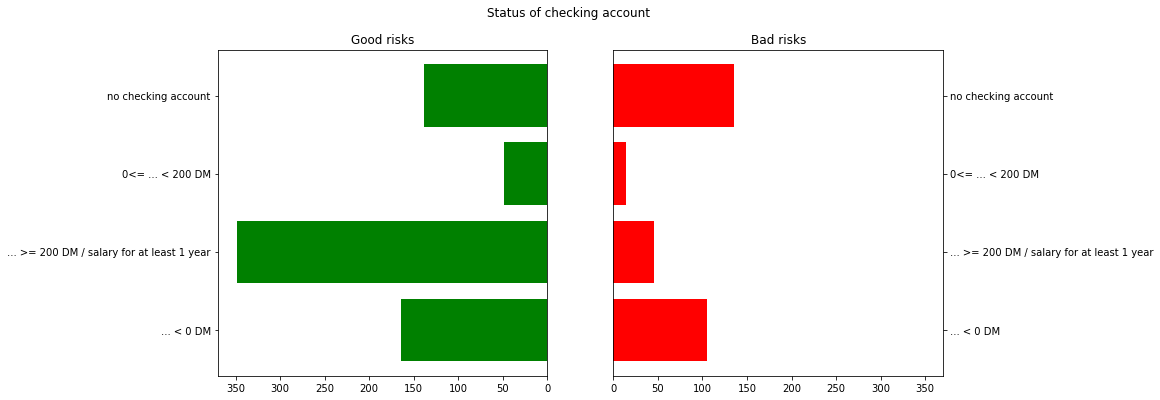

In [12]:
goods = df[df['credit_risk']=="good"].groupby('status',as_index=False).count()
bads = df[df['credit_risk']=="bad"].groupby('status', as_index=False).count()

fig, ax = plt.subplots(1, 2,figsize=(13,6))
fig.suptitle('Status of checking account')

ax[0].barh(goods['status'],goods['duration'],color='g')
ax[0].set_title('Good risks')
ax[0].set_xlim(370,0)

ax[1].barh(bads['status'],bads['duration'],color='r')
ax[1].set_title('Bad risks')
ax[1].set_xlim(0,370)
ax[1].yaxis.tick_right()

plt.show()

### Задание 8  

In [13]:
import seaborn as sns

Теперь рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn и более классических гистограмм. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

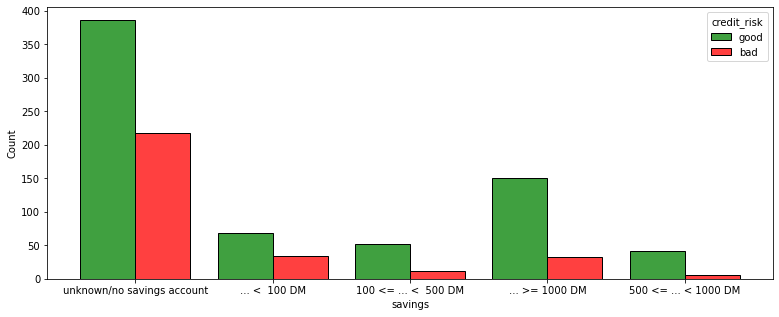

In [14]:
plt.figure(figsize=(13,5))
sns.histplot(data=df, x="savings",hue="credit_risk" ,multiple="dodge",shrink=0.8,palette =['g','r'])
plt.show()

Как с точки зрения трудоемкости кода, так и с точки зрения восприятия результата, способ построения классических гистограмм  c помощью seaborn мне понравился больше. Так как необходимо написать меньше кода и все данные находятся в одной общей координатной плоскости, поэтому намного нагляднее получается

### Задание 9 

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например.

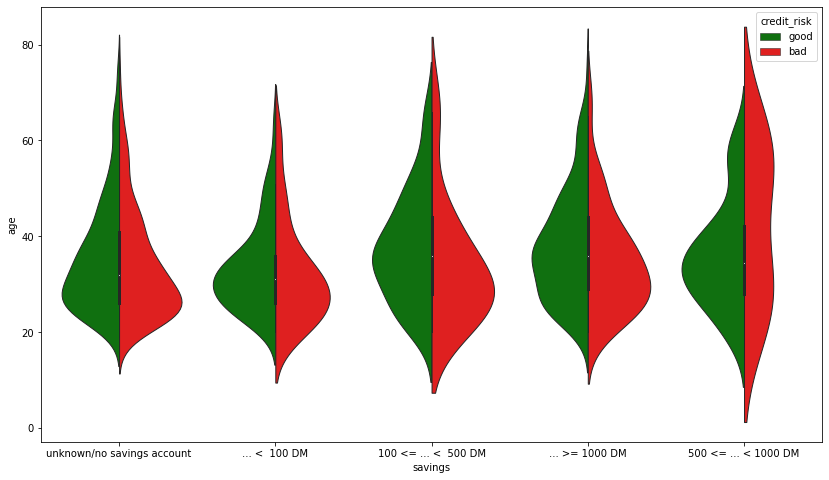

In [15]:
plt.figure(figsize=(14,8))
sns.violinplot(data=df, x="savings", y="age", hue="credit_risk",
               split=True, inner="box", linewidth=1,palette =['g','r'] )
plt.show()

### Задание 10 

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

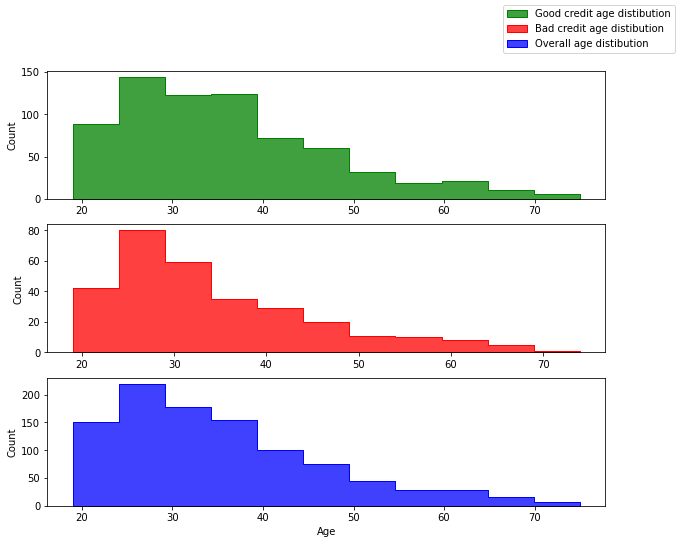

In [16]:
fig, ax = plt.subplots(3,1,figsize=(10,8))
sns.histplot(data=df,ax=ax[2], x="age",color='b',label ='Overall age distibution',bins=11,element="step")
sns.histplot(data=df[df['credit_risk']=="good"],ax=ax[0], x="age",color='g',label='Good credit age distibution',bins=11,element="step")
sns.histplot(data=df[df['credit_risk']=="bad"],ax=ax[1], x="age",color='r',label='Bad credit age distibution',bins=11,element="step")
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('Age')

plt.figlegend(loc='upper right')
plt.show()

### Задание 11 

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

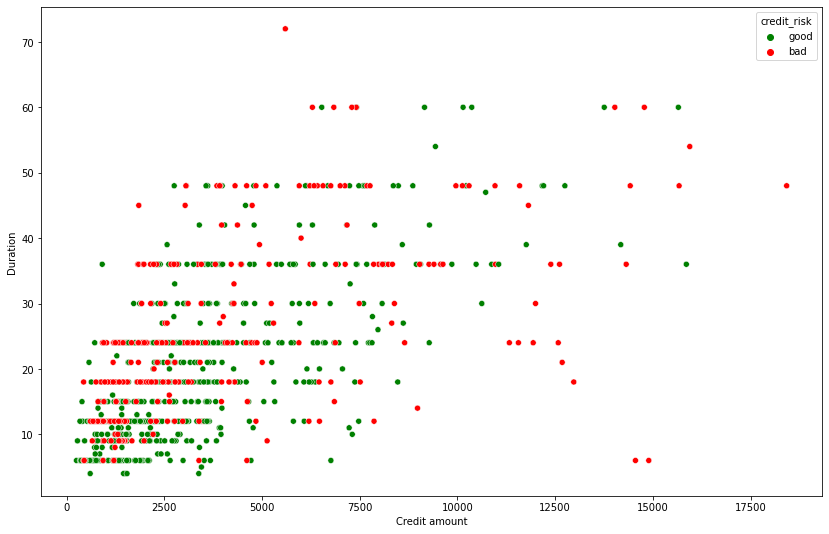

In [17]:
plt.figure(figsize=(14,9))
fig = sns.scatterplot(data=df, x='amount', y='duration', hue='credit_risk',palette=['g','r'])
fig.set(xlabel='Credit amount', ylabel='Duration')
plt.show()

### Задание 12 

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

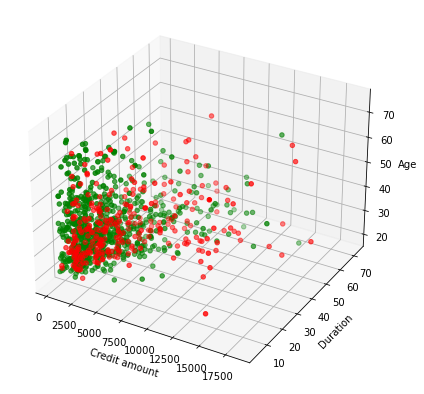

In [18]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot( projection = '3d')

x = df['amount'][df['credit_risk']=='good']
y = df['duration'][df['credit_risk']=='good']
z = df['age'][df['credit_risk']=='good']

x1 = df['amount'][df['credit_risk']=='bad']
y1 = df['duration'][df['credit_risk']=='bad']
z1 = df['age'][df['credit_risk']=='bad']

ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

ax.scatter(x1, y1, z1,c='r')
ax.scatter(x, y, z,c='g')

plt.show()

### Задание 13  

Представьте все порядковые и бинарные признаки в виде числовых значений (0, .., n). Избавьтесь от номинальных признаков.

Эти значения ранжируются, так как мне нравится с помощью  LabelEncoder.Под ранжированием я полагаю, что чем больше значение признака, тем больше вероятность что кредит имеет "good risk".  Это необходимо, так как в последнем задании я буду оценивать сумму по признакам. 

In [19]:
columns = ['number_credits','credit_risk','foreign_worker','telephone','people_liable']

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for item in columns:
    df[item] = labelencoder.fit_transform(df[item])


Сделал ранжирование этих порядковых признаков вручную, так как LabelEncoding ранжирует не по той логике, которая мне потребуется в следующем задании. 

In [20]:
df.loc[df['status']=='no checking account','status'] = 2
df.loc[df['status']=='... < 0 DM','status']=1
df.loc[df['status']=='... >= 200 DM / salary for at least 1 year','status']=3
df.loc[df['status']=='0<= ... < 200 DM','status']=0

df.loc[df['credit_history']=='all credits at this bank paid back duly','credit_history']=4
df.loc[df['credit_history']=='no credits taken/all credits paid back duly','credit_history']=2
df.loc[df['credit_history']=='existing credits paid back duly till now','credit_history']=3
df.loc[df['credit_history']=='delay in paying off in the past','credit_history']=1
df.loc[df['credit_history']=='critical account/other credits elsewhere','credit_history']=0

df.loc[df['savings']=='unknown/no savings account','savings']=0
df.loc[df['savings']=='... <  100 DM','savings']=1
df.loc[df['savings']=='100 <= ... <  500 DM','savings']=2
df.loc[df['savings']=='... >= 1000 DM','savings']=4
df.loc[df['savings']=='500 <= ... < 1000 DM','savings']=3

df.loc[df['employment_duration']=='< 1 yr','employment_duration']=1
df.loc[df['employment_duration']=='1 <= ... < 4 yrs','employment_duration']=2
df.loc[df['employment_duration']=='4 <= ... < 7 yrs','employment_duration']=3
df.loc[df['employment_duration']=='unemployed','employment_duration']=0
df.loc[df['employment_duration']=='>= 7 yrs','employment_duration']=4

df.loc[df['installment_rate']=='< 20','installment_rate']=0
df.loc[df['installment_rate']=='25 <= ... < 35','installment_rate']=1
df.loc[df['installment_rate']=='20 <= ... < 25','installment_rate']=2
df.loc[df['installment_rate']=='>= 35','installment_rate']=3


df.loc[df['present_residence']=='>= 7 yrs','present_residence']=4
df.loc[df['present_residence']=='1 <= ... < 4 yrs','present_residence']=2
df.loc[df['present_residence']=='4 <= ... < 7 yrs','present_residence']=3
df.loc[df['present_residence']=='< 1 yr','present_residence']=0

Делаю One-Hot кодирование для категориальных признаков с помощью pd.get_dummies()

In [21]:
df_1 = pd.get_dummies(df[['purpose','personal_status_sex',
         'property','other_installment_plans',
         'housing','job','other_debtors']])

df.drop(['purpose','personal_status_sex',
         'property','other_installment_plans',
         'housing','job','other_debtors'], 
        axis=1, inplace=True)

df['index'] = df.index
df_1['index'] = df_1.index

df_new = df.merge(df_1,on='index') 
del df_new['index']
del df['index']

Исправленный датасет выглядит так

In [22]:
df_new.head(5)

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,...,housing_for free,housing_own,housing_rent,job_manager/self-empl./highly qualif. employee,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident,other_debtors_co-applicant,other_debtors_guarantor,other_debtors_none
0,2,18,4,1049,0,1,0,4,21,0,...,1,0,0,0,1,0,0,0,0,1
1,2,9,4,2799,0,2,1,2,36,1,...,1,0,0,0,1,0,0,0,0,1
2,1,12,2,841,1,3,1,4,23,0,...,1,0,0,0,0,0,1,0,0,1
3,2,12,4,2122,0,2,2,2,39,1,...,1,0,0,0,0,0,1,0,0,1
4,2,12,4,2171,0,2,0,4,38,1,...,0,0,1,0,0,0,1,0,0,1


### Задание 14 

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше! Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [23]:

def normalize(matrix: np.array) -> np.array:
    means = np.mean(matrix,axis = 0)
    stds= np.std(matrix,axis = 0)
    stds = np.where(np.isnan(stds), 1, stds)
    return ((matrix - means)/stds)

def predict(Xtest: np.array) -> np.array:
    Xtest = Xtest.astype(float)
    X_norm = normalize(Xtest)
    Xtest = X_norm
    Xtest =  Xtest
    Xtest[:,3] *= -1.5
    Xtest[:,1] *= -2
    Xtest = np.delete(Xtest, [7,8,-3], axis=1)
    result = Xtest.sum(axis=1)
    result = np.where(result >= np.mean(result),1,0)
    return result
    

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df.drop('credit_risk', 1).values
y = df['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

accuracy_score(y_test, predict(X_test))

0.72

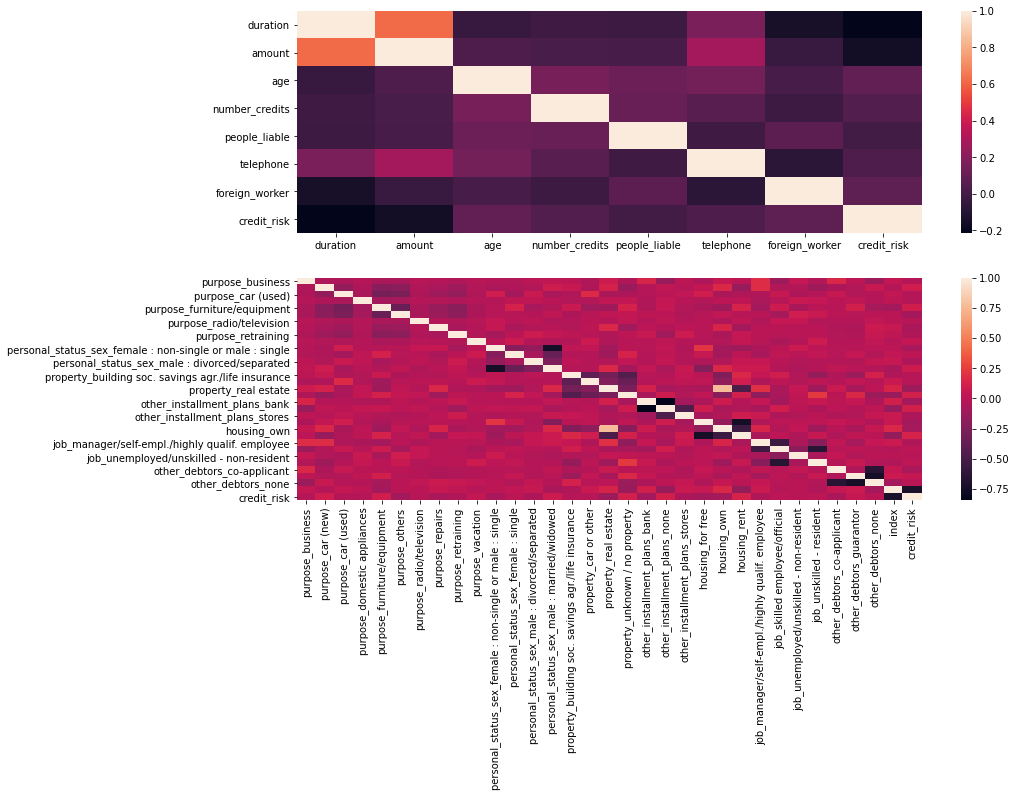

In [24]:
df_new['index'] = df_new.index
df_1['index'] = df_1.index
df_heat = df_1.merge(df_new[['index','credit_risk']],on='index') 
fig,ax =  plt.subplots(2,1,figsize=(14,9))
sns.heatmap(df_heat.corr(method='pearson'),ax=ax[1])
sns.heatmap(df.corr(method='pearson'),ax=ax[0])
plt.show()

Как видно из графиков, номинальные признаки очень слабо коррелируют с credit_risk, в отличии от порядковых, бинарных и вещественных. Поэтому я решил избавиться от всех номинальных признаков. Так же я решил, что возраст клиента, время проживания в одном месте и наличие телефона не сильно влияет на кредитный риск, поэтому и от них я тоже избавился. Далее я нормализовал данныые. Из верхнего графика видно, что сумма и длительность достаточно сильно влияют на credit_risk(корреляция отрицательная, следовательно зависимость обратная, поэтому эти признаки взял со знаком минус). Поэтому я увеличил их веса (значения весов подобрал методом проб и ошибок). Проведя суммирование построчно, значения, которые оказались выше среднего - хороший риск, ниже - плохой риск. Получил удовлетворяющую меня и задание accuracy и успокоился. 